In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import OLSInfluence

In [15]:
# Configurar estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

In [16]:
# ------------------------------------------
# DADOS FORNECIDOS
# ------------------------------------------

data = {
    'Empresa': [
        'Alpargatas', 'Americanas', 'Azul', 'BRF', 'Bradesco', 'Braskem',
        'Btg Pactual', 'C&A', 'Camil', 'Carrefour', 'Eletrobras', 'Embraer',
        'Engie Brasil', 'Fleury', 'Gerdau', 'Gol', 'Itaú', 'JBS', 'Klabin',
        'Localiza', 'Natura', 'Neoenergia', 'Petrobras', 'Raia Drogasil',
        'Raízen', 'Renner', 'Suzano', 'TIM', 'TOTVS', 'WEG'
    ],
    'Disclosure': [
        0.7105, 0.5526, 0.7368, 0.7368, 0.6316, 0.7105, 0.2632, 0.6579,
        0.6842, 0.5526, 0.6842, 0.8158, 0.8684, 0.6053, 0.6842, 0.5000,
        0.6053, 0.6316, 0.7105, 0.6053, 0.5526, 0.7105, 0.7105, 0.7632,
        0.5263, 0.7368, 0.7368, 0.7368, 0.5000, 0.6053
    ],
    'MERCO': [
        6197, 5142, 4419, 5666, 6727, 4662, 4106, 4776, 4256, 4054,
        4162, 5067, 3927, 5411, 6183, 4454, 7875, 4913, 4538, 5429,
        10000, 3926, 4523, 4772, 3000, 6267, 5840, 4044, 4369, 3365
    ]
}

df = pd.DataFrame(data)
df

,Empresa,Disclosure,MERCO
0,Alpargatas,0.7105,6197
1,Americanas,0.5526,5142
2,Azul,0.7368,4419
3,BRF,0.7368,5666
4,Bradesco,0.6316,6727
5,Braskem,0.7105,4662
6,Btg Pactual,0.2632,4106
7,C&A,0.6579,4776
8,Camil,0.6842,4256
9,Carrefour,0.5526,4054


In [17]:
# ------------------------------------------
# ANÁLISE EXPLORATÓRIA
# ------------------------------------------

print("\nEstatísticas Descritivas:")
print(df[['Disclosure', 'MERCO']].describe())


Estatísticas Descritivas:
       Disclosure         MERCO
count   30.000000     30.000000
mean     0.650870   5069.000000
std      0.116644   1397.169108
min      0.263200   3000.000000
25%      0.605300   4185.500000
50%      0.684200   4717.000000
75%      0.730225   5606.750000
max      0.868400  10000.000000


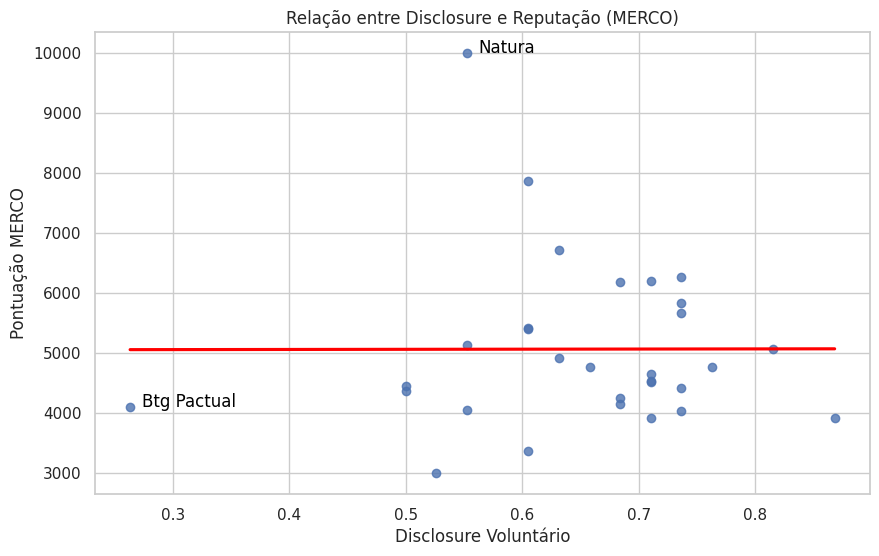

In [18]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
scatter = sns.regplot(x='Disclosure', y='MERCO', data=df, ci=None, line_kws={'color': 'red'})
plt.title('Relação entre Disclosure e Reputação (MERCO)')

# Destacar outliers
outliers = df[(df['MERCO'] > 8000) | (df['Disclosure'] < 0.3)]
for _, row in outliers.iterrows():
    scatter.text(row['Disclosure']+0.01, row['MERCO'], row['Empresa'], 
                 horizontalalignment='left', size='medium', color='black')

plt.xlabel('Disclosure Voluntário')
plt.ylabel('Pontuação MERCO')
plt.show()

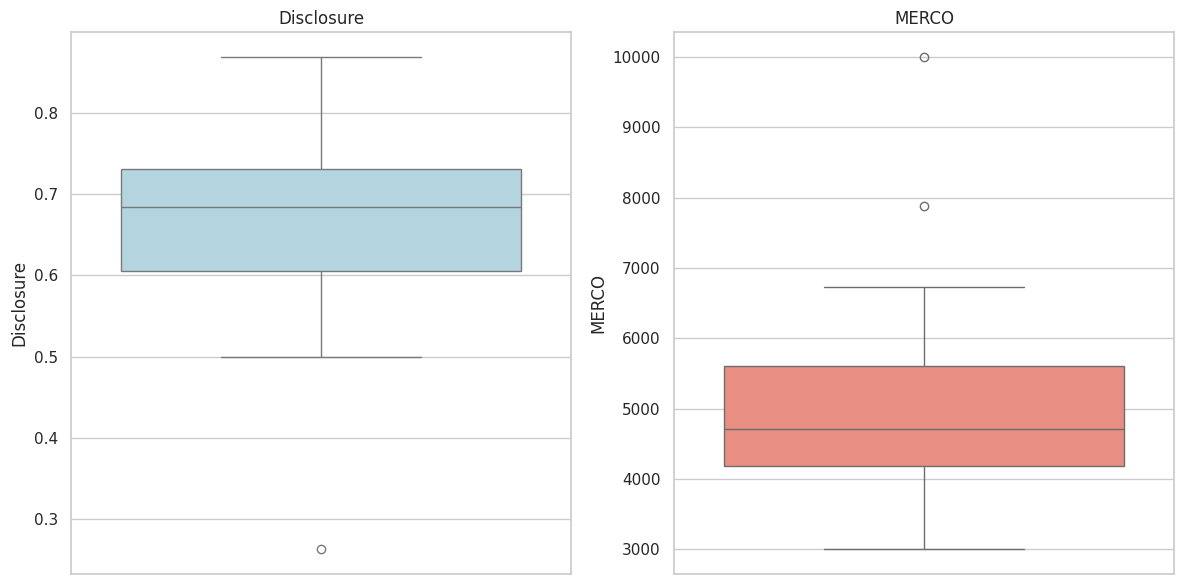

In [19]:
# Boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(y=df['Disclosure'], ax=axes[0], color='lightblue').set_title('Disclosure')
sns.boxplot(y=df['MERCO'], ax=axes[1], color='salmon').set_title('MERCO')
plt.tight_layout()
plt.show()

In [20]:
# ------------------------------------------
# CORRELAÇÃO
# ------------------------------------------

pearson_corr, pearson_p = stats.pearsonr(df['Disclosure'], df['MERCO'])
spearman_corr, spearman_p = stats.spearmanr(df['Disclosure'], df['MERCO'])

print(f"\nCorrelação de Pearson: {pearson_corr:.3f} (p-valor = {pearson_p:.4f})")
print(f"Correlação de Spearman: {spearman_corr:.3f} (p-valor = {spearman_p:.4f})")


Correlação de Pearson: 0.002 (p-valor = 0.9919)
Correlação de Spearman: 0.077 (p-valor = 0.6866)


In [21]:
# ------------------------------------------
# REGRESSÃO LINEAR
# ------------------------------------------

X = sm.add_constant(df['Disclosure'])
y = df['MERCO']

model = sm.OLS(y, X).fit()
print("\nResumo da Regressão Linear:")
print(model.summary())


Resumo da Regressão Linear:
                            OLS Regression Results                            
Dep. Variable:                  MERCO   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                 0.0001041
Date:                Tue, 04 Feb 2025   Prob (F-statistic):              0.992
Time:                        02:14:18   Log-Likelihood:                -259.33
No. Observations:                  30   AIC:                             522.7
Df Residuals:                      28   BIC:                             525.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5053.9656  

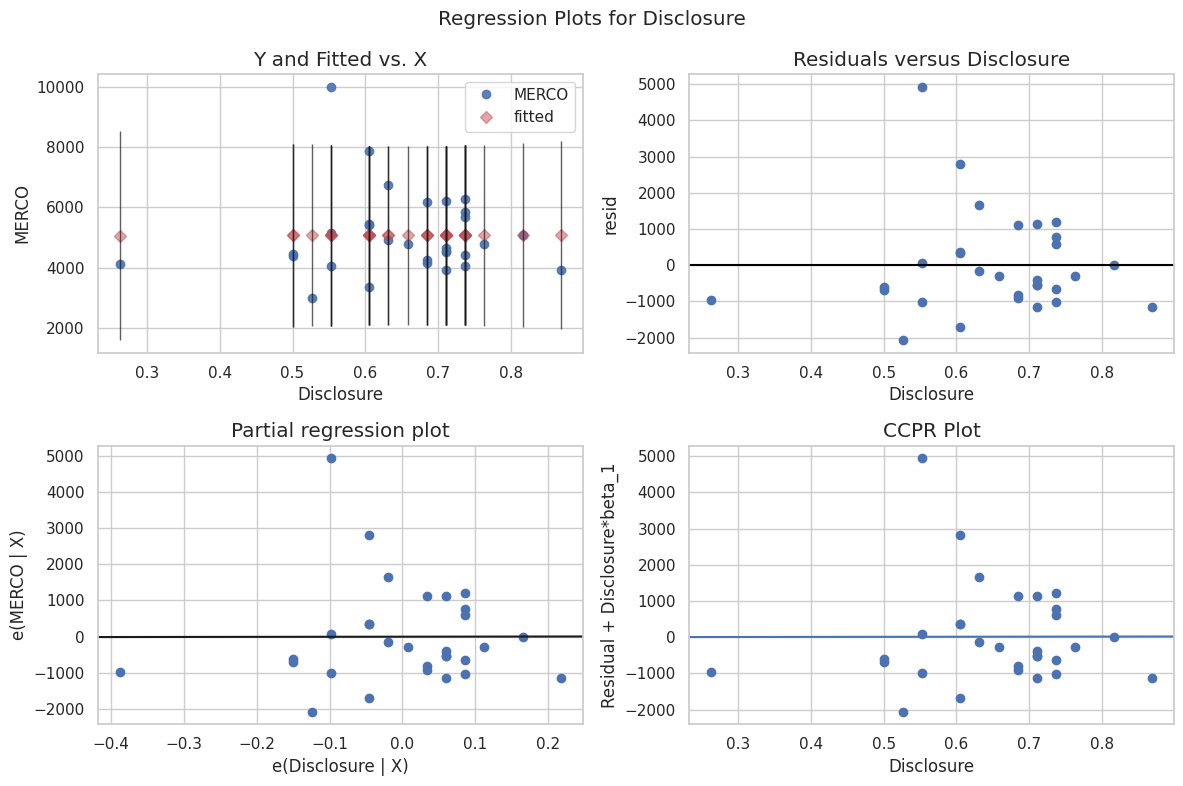

In [22]:
# Diagnóstico de pressupostos
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(model, 'Disclosure', fig=fig)
plt.show()

In [23]:
# Teste de normalidade dos resíduos
shapiro_test = stats.shapiro(model.resid)
print(f"\nTeste de Shapiro-Wilk: W = {shapiro_test[0]:.3f}, p = {shapiro_test[1]:.4f}")

# Teste de heterocedasticidade
bp_test = het_breuschpagan(model.resid, model.model.exog)
print(f"Teste de Breusch-Pagan: LM = {bp_test[0]:.3f}, p = {bp_test[1]:.4f}")


Teste de Shapiro-Wilk: W = 0.862, p = 0.0011
Teste de Breusch-Pagan: LM = 1.263, p = 0.2611


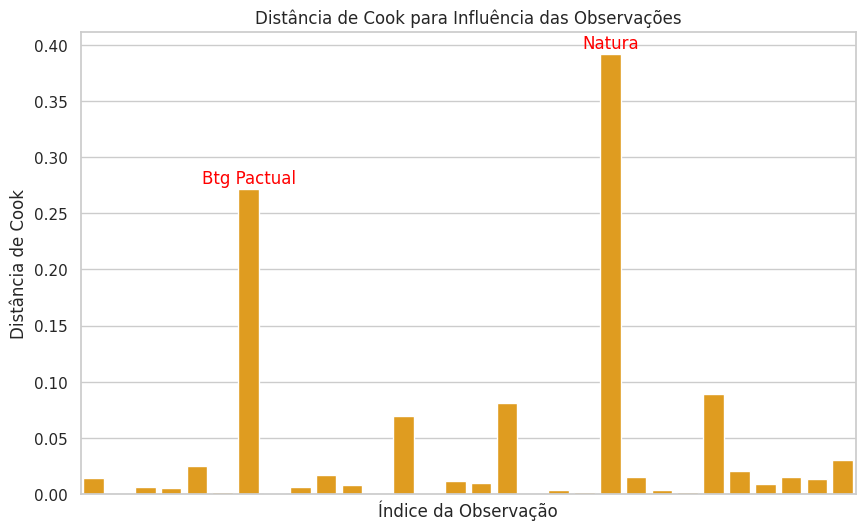

In [24]:
# Distância de Cook
influence = OLSInfluence(model)
df['Cook_Distance'] = influence.cooks_distance[0]

plt.figure(figsize=(10, 6))
cook_plot = sns.barplot(x=df.index, y='Cook_Distance', data=df, color='orange')
plt.title('Distância de Cook para Influência das Observações')

# Destacar pontos influentes
threshold = 4/len(df)
for idx, row in df.iterrows():
    if row['Cook_Distance'] > threshold:
        cook_plot.text(idx, row['Cook_Distance']+0.005, row['Empresa'], 
                      horizontalalignment='center', size='medium', color='red')

plt.xlabel('Índice da Observação')
plt.ylabel('Distância de Cook')
plt.xticks([])
plt.show()

In [25]:
# ------------------------------------------
# ANÁLISE DE SENSIBILIDADE (SEM NATURA)
# ------------------------------------------

df_sem_outlier = df[df['Empresa'] != 'Natura']

X_sem = sm.add_constant(df_sem_outlier['Disclosure'])
y_sem = df_sem_outlier['MERCO']

model_sem = sm.OLS(y_sem, X_sem).fit()

print("\nComparação de Modelos:")
print("\nModelo Original:")
print(f"Coeficiente Disclosure: {model.params[1]:.1f} (p = {model.pvalues[1]:.4f})")
print(f"R²: {model.rsquared:.3f}")

print("\nModelo sem Natura:")
print(f"Coeficiente Disclosure: {model_sem.params[1]:.1f} (p = {model_sem.pvalues[1]:.4f})")
print(f"R²: {model_sem.rsquared:.3f}")


Comparação de Modelos:

Modelo Original:
Coeficiente Disclosure: 23.1 (p = 0.9919)
R²: 0.000

Modelo sem Natura:
Coeficiente Disclosure: 1327.1 (p = 0.4475)
R²: 0.022


/tmp/ipykernel_13858/763096810.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Coeficiente Disclosure: {model.params[1]:.1f} (p = {model.pvalues[1]:.4f})")
/tmp/ipykernel_13858/763096810.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Coeficiente Disclosure: {model_sem.params[1]:.1f} (p = {model_sem.pvalues[1]:.4f})")
/tmp/ipykernel_13858/763096810.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(